In [1]:
#importing the used classes
import ROOT
from array import array
from ROOT import TFile, TCanvas, TTree, TH1D, TH2D, gROOT, AddressOf, TGraph
#defining the data structure of the file
gROOT.ProcessLine(
"struct slimport_data_t {\
    ULong64_t timetag;\
    UInt_t baseline;\
    UShort_t qshort;\
    UShort_t qlong;\
    UShort_t pur;\
    UShort_t scope[360];\
};" );

from ROOT import slimport_data_t

Welcome to JupyROOT 6.16/00


In [2]:
#loading the file
file = TFile("/home/daniele/Desktop/digital_timing.root")
tree = file.Get("acq_tree_0")

In [7]:
#defining functions that return our plots
def GetHisto(channel=0, branch='qlong', nbins=4000, xmin=0, xmax=20000):
    struct = slimport_data_t()
    branch = tree.GetBranch("acq_ch"+str(channel))
    branch.SetAddress(AddressOf(struct, 'timetag'))
    histo = TH1D("spectrum", "spectrum", nbins, xmin, xmax)

    for i in range(branch.GetEntries()):
        branch.GetEntry(i)
        histo.Fill(struct.qlong)

    return histo; 


def Get2DHisto(channel1=0, channel2=1, branch1='qlong', branch2='qlong'):
    struct1 = slimport_data_t()
    struct2 = slimport_data_t()

    branch1 = tree.GetBranch("acq_ch"+str(channel1))
    branch2 = tree.GetBranch("acq_ch"+str(channel2))
    
    branch1.SetAddress(AddressOf(struct1, 'timetag'))
    branch2.SetAddress(AddressOf(struct2, 'timetag'))

    
    histo = TH2D("2Dspectrum", "2Dspectrum", 1000, 0, 1000, 1000, 0, 1000)

    
    nev1 = branch1.GetEntries()
    nev2 = branch2.GetEntries()
    it1 = 0
    it2 = 0
    
    while it1<nev1 and it2<nev2:
        branch1.GetEntry(it1)
        branch2.GetEntry(it2)
        #complete the program!!
        
    return histo

    
def GetSignal(channel=0, nsamples=4096, evNr=2):
    struct = slimport_data_t()
    branch = tree.GetBranch("acq_ch"+str(channel))
    branch.SetAddress(AddressOf(struct, 'timetag'))
    
    branch.GetEntry(evNr)
    #x=array('H', nsamples*[0])
    #y=array('H', nsamples*[0])
    graph = TGraph(nsamples)

    for i in range(nsamples):
        graph.SetPoint(i, i, struct.scope[i])
    
    return graph



Warning in <TFile::Append>: Replacing existing TH1: spectrum (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: spectrum (Potential memory leak).


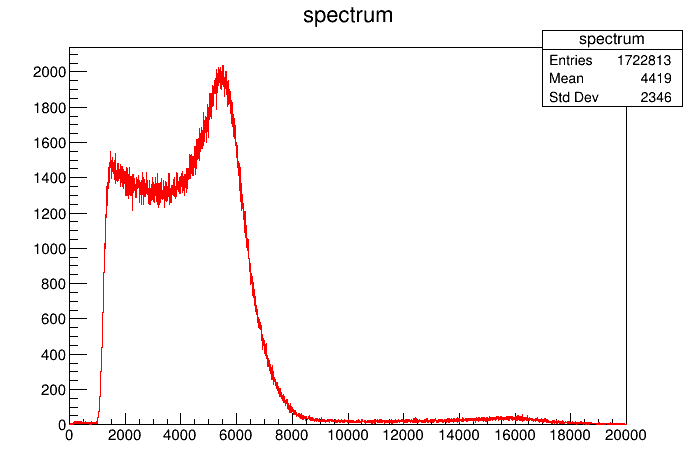

In [16]:
#plotting  two histograms
histo = GetHisto()
histo2 = GetHisto(branch='qshort')

ROOT.disableJSVis()

cv = TCanvas()
histo2.SetLineColor(2)

histo.Draw()
histo2.Draw('same')
cv.Draw()

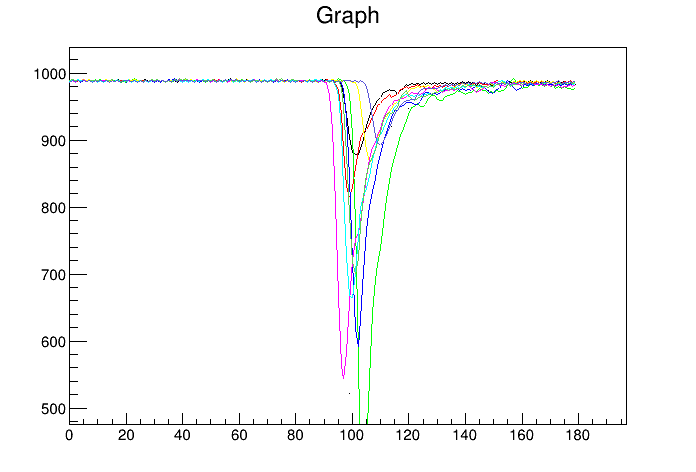

In [18]:
#plotting the signals

graphs = []

for i in range(10):
    graphs.append(GetSignal(nsamples=180, evNr=i))
    graphs[-1].SetLineColor(i)

cv2 = TCanvas()
graphs[0].Draw()
for graph in graphs:
    graph.Draw("same")
    
cv2.Draw()


